In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = 10, 8
dic = {"size": 14}
matplotlib.rc('font', **dic)

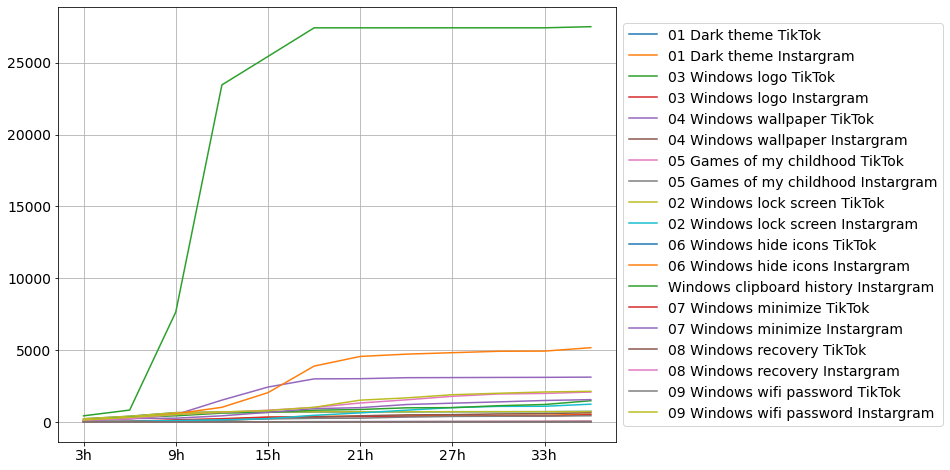

In [4]:
# Load data
df = pd.read_csv("TikTokAnalytics.csv")
df['label'] = df['Name'] + " " + df['Platform']
df = df.T
df.columns = df.iloc[-1]
df.drop(['Name', 'Platform', 'label'], inplace=True)        
df.plot(legend=False)
plt.grid(zorder=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

""


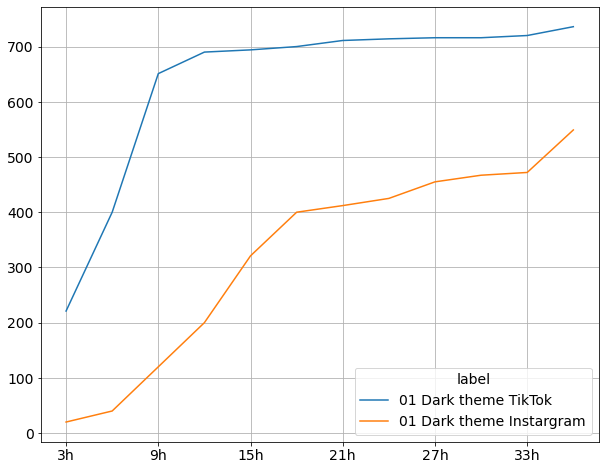

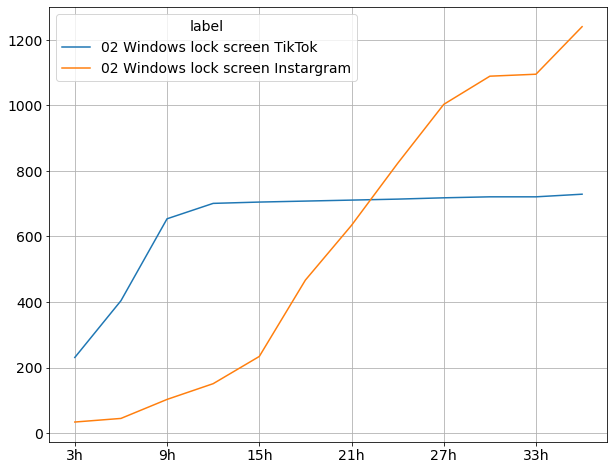

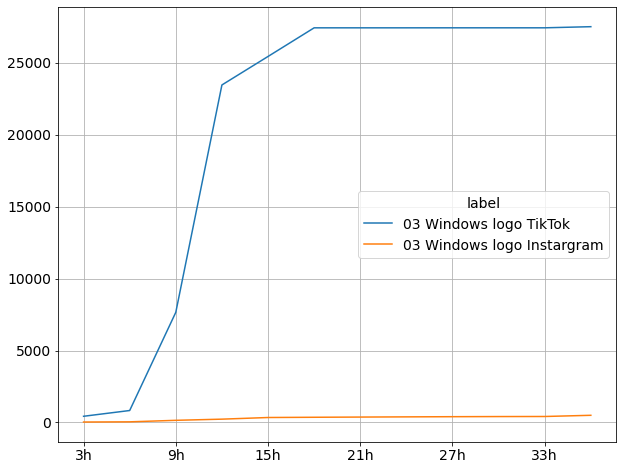

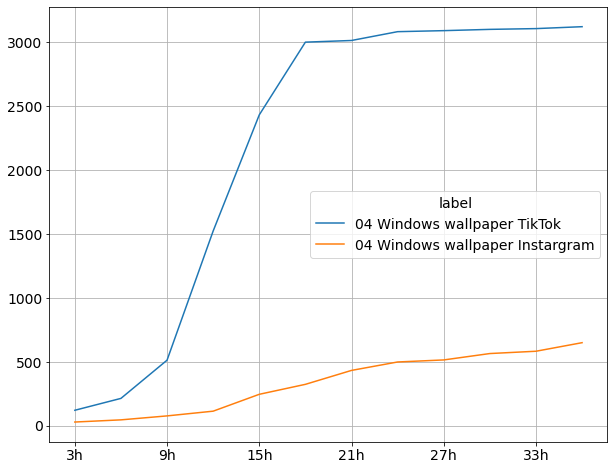

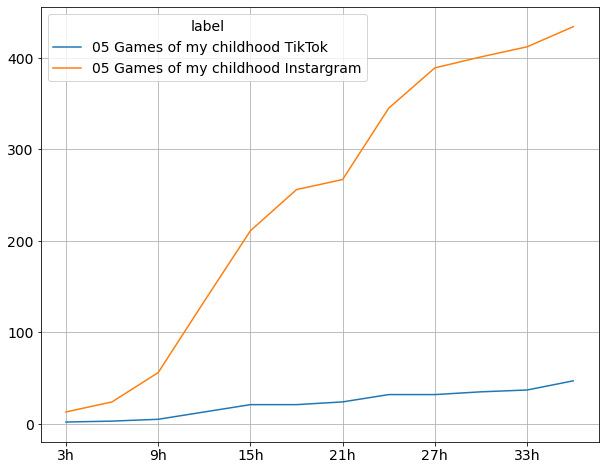

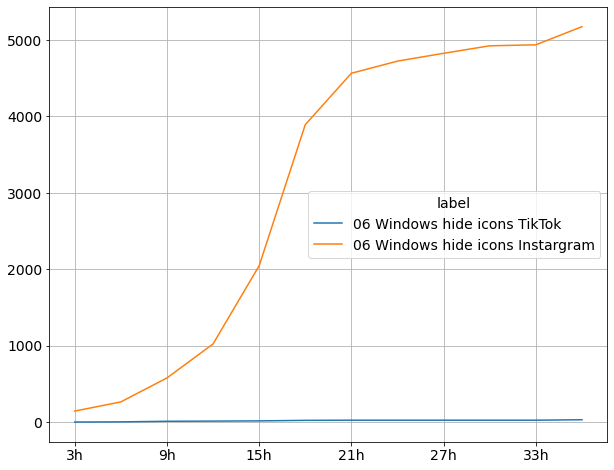

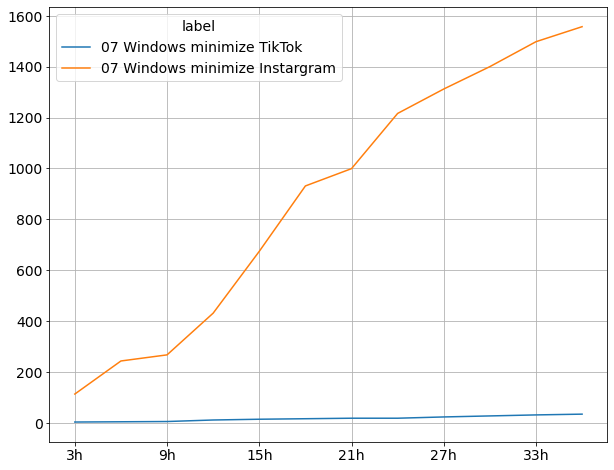

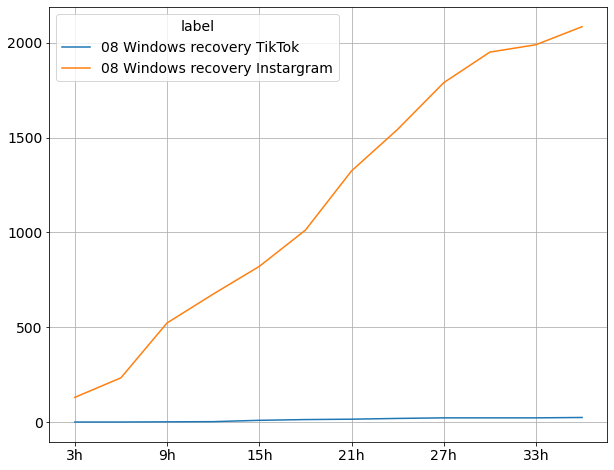

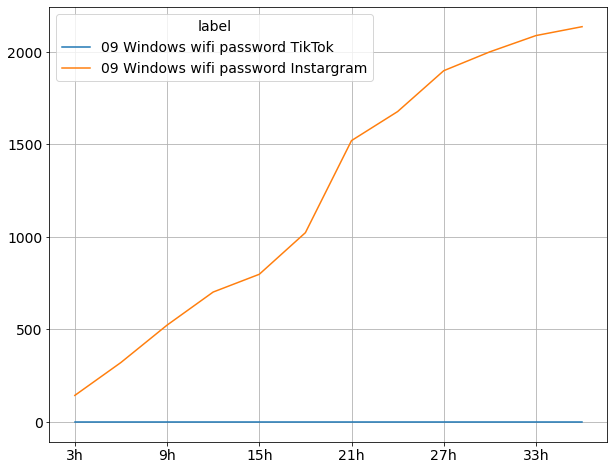

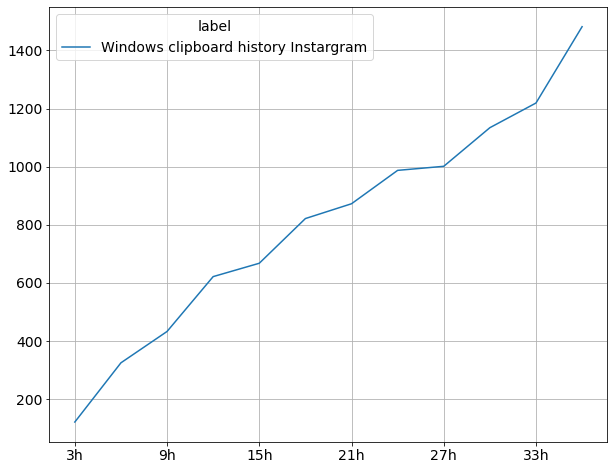

In [5]:
def cumulative_views(temp):
    video = temp['Name'].iloc[0]
    temp = temp.T
    temp.columns = temp.iloc[-1]
    temp.drop(['Name', 'Platform', 'label'], inplace=True)
    axes = temp.plot().get_figure()
    plt.grid(zorder=0)
    axes.savefig("cumulatives/" + video + ".png")

df = pd.read_csv("TikTokAnalytics.csv")
df['label'] = df['Name'] + " " + df['Platform']
df.groupby('Name').apply(cumulative_views)

""


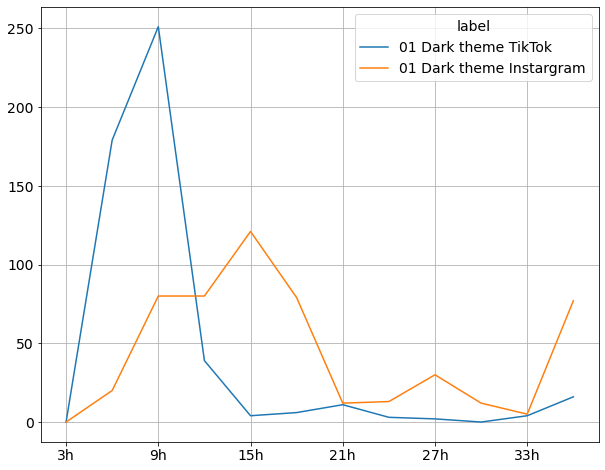

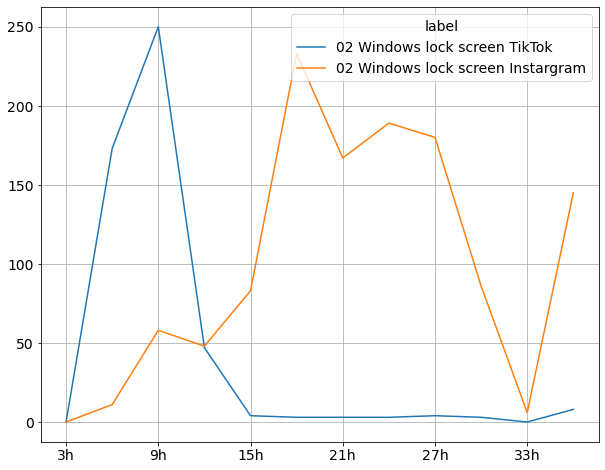

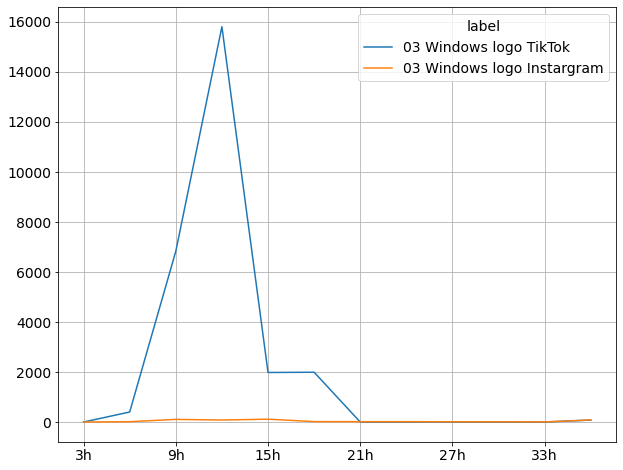

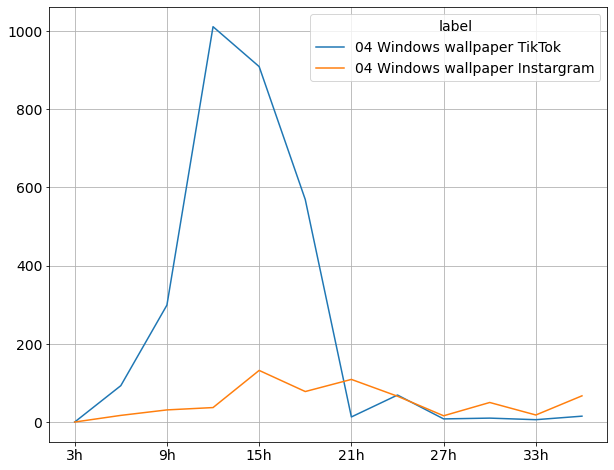

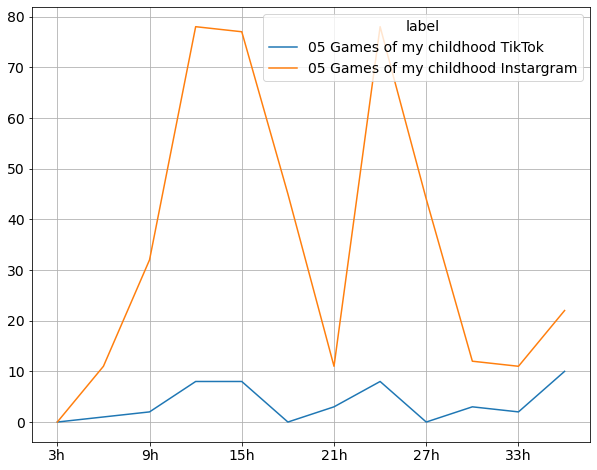

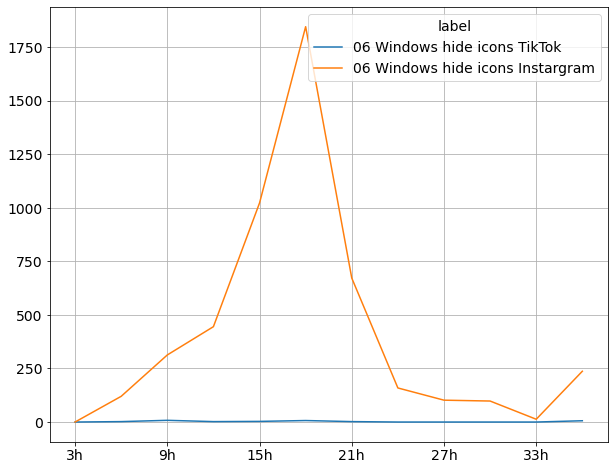

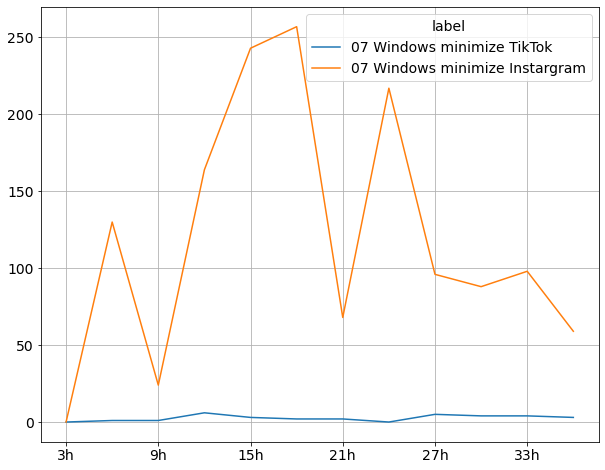

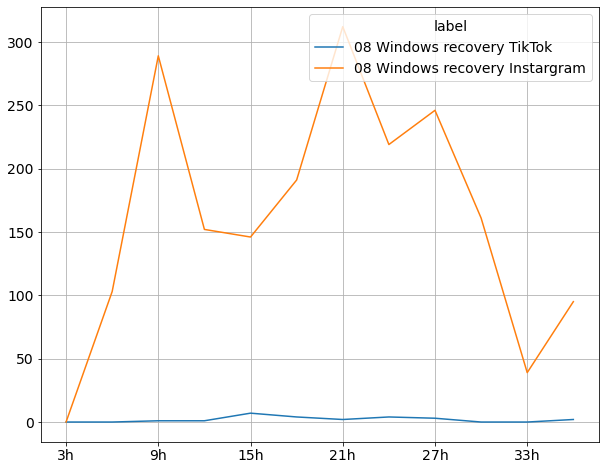

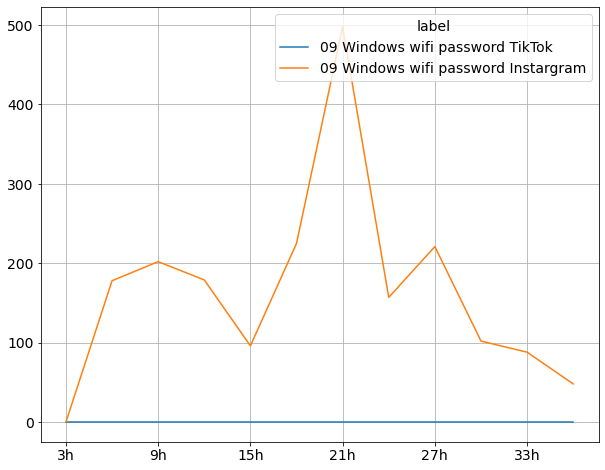

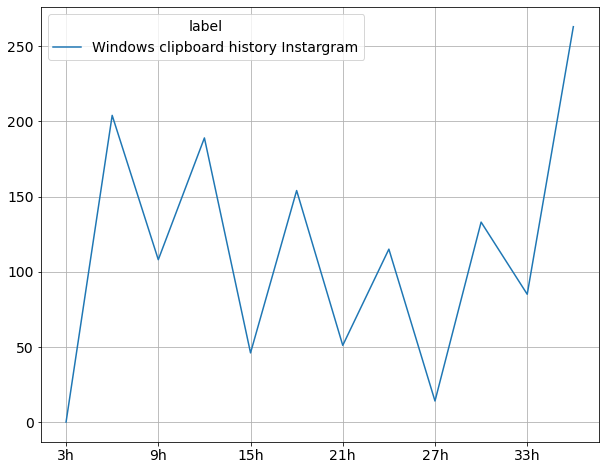

In [6]:
def process_video(temp):
    video = temp['Name'].iloc[0]
    temp = temp.T
    temp.columns = temp.iloc[-1]
    temp.drop(['Name', 'Platform', 'label'], inplace=True)
    temp = temp.apply(pd.to_numeric)
    temp = temp - temp.shift(1)
    temp = temp.fillna(0)
    axes = temp.plot().get_figure()
    plt.grid(zorder=0)
    axes.savefig("increases/" + video + ".png")

df = pd.read_csv("TikTokAnalytics.csv")
df['label'] = df['Name'] + " " + df['Platform']
df.groupby('Name').apply(process_video)